<a href="https://colab.research.google.com/github/arian-kabir/A-machine-learning-model-for-segmenting-transactions-and-prediction/blob/main/A_machine_learning_model_for_transactions_segmentation_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Dataset Import


Currently the file is being used by drive mount.
In order to run the code in colab download the dataset from the following link and upload it in the content directory.

[Dataset file link](https://drive.google.com/file/d/1BfoR3omyanyaMbA9QCy5zLbCVGTUhf68/view?usp=sharing)

To give colab file access change the code in the next code tab with this:

dataset = pd.read_csv("copy the path of the downloaded file")

display(dataset.head(3))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Reading the Sample CSV file
dataset = pd.read_csv("/content/drive/My Drive/retail_store_sales.csv")
# dataset = pd.read_csv("/content/drive/My Drive/23201029_Labexam/retail_store_sales.csv")
display(dataset.head(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


Figuring out the null values in the dataset

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
14,TXN_2490363,CUST_09,Milk Products,Item_16_MILK,27.5,2.0,55.0,Digital Wallet,Online,2022-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12564,TXN_2153066,CUST_17,Electric household essentials,NaN,29.0,NaN,NaN,Digital Wallet,In-store,2024-03-28,False
12568,TXN_1096134,CUST_06,Food,Item_4_FOOD,9.5,8.0,76.0,Digital Wallet,In-store,2022-06-11,NaN
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN


# Dataset Summary and Dimensions


In [ ]:
print("Dataset Summary\n")
dataset.info()
print("\nDataset Dimensions\n")
print ('The dataset contains {} rows and {} columns.'.format(dataset.shape,dataset.shape[0],dataset.shape[1]))

Dataset Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB

Dataset Dimensions

The dataset contains (12575, 11) rows and 12575 columns.


# Separating numerical and Categorical data

In [ ]:
##Selecting numerical features
numerical_data = dataset.select_dtypes(include='number')

numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['Price Per Unit', 'Quantity', 'Total Spent']


In [ ]:
#Selecting categoricalfeatures
categorical_data=dataset.select_dtypes(include= 'object')

categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 8 categorical features: 

['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method', 'Location', 'Transaction Date', 'Discount Applied']


## Summary statistics of Numerical Features

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price Per Unit,11966.0,23.365912,10.743519,5.0,14.0,23.0,33.5,41.0
Quantity,11971.0,5.536380,2.857883,1.0,3.0,6.0,8.0,10.0
Total Spent,11971.0,129.652577,94.750697,5.0,51.0,108.5,192.0,410.0


## Summary statistics of categorical features

In [ ]:
categorical_data.describe().T

,count,unique,top,freq
Transaction ID,12575,12575,TXN_2407494,1
Customer ID,12575,25,CUST_05,544
Category,12575,8,Electric household essentials,1591
Item,11362,200,Item_2_BEV,126
Payment Method,12575,3,Cash,4310
Location,12575,2,Online,6354
Transaction Date,12575,1114,2022-05-30,26
Discount Applied,8376,2,True,4219


## Variance of each numerical features

In [ ]:
print("Variance")
numerical_data.var()

Variance


,0
Price Per Unit,115.423201
Quantity,8.167494
Total Spent,8977.694534


In [ ]:
print("Skewness")
numerical_data.skew()

Skewness


,0
Price Per Unit,-0.034977
Quantity,-0.011948
Total Spent,0.831295


#Skewness Interpretation

*   Price Per Unit	-0.034977 : Almost symmetrical
*   Quantity	-0.011948 : Almost symmetrical
*   Total Spent	0.831295 : Moderate skew


# Histogram and Box plot diagrams for visual representation of data

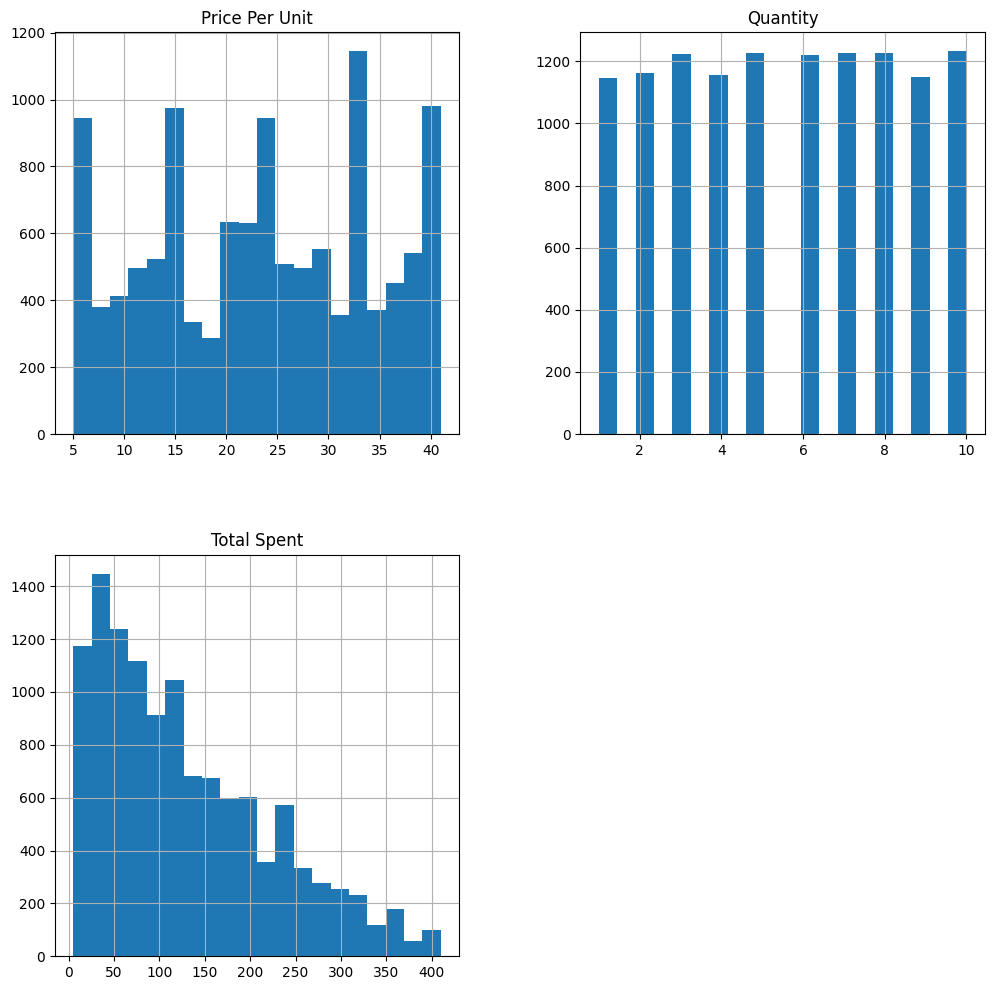

In [ ]:
#histogram
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

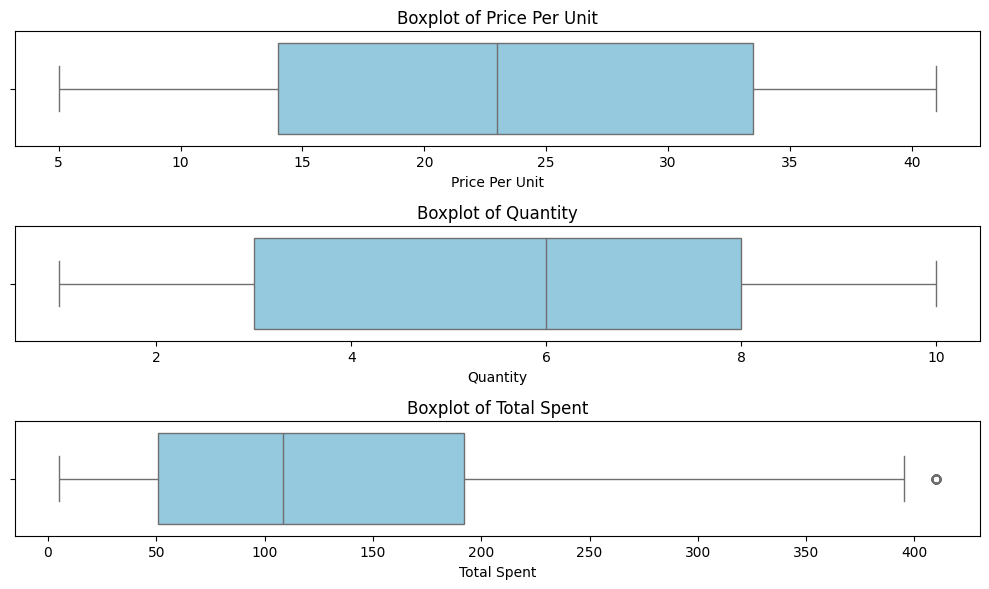

In [ ]:
#box plot
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dataset[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()


#Unique and null values in numeric features

##Unique values

In [ ]:
numerical_data.nunique()

,0
Price Per Unit,25
Quantity,10
Total Spent,227


## Number of missing values in each feature

In [ ]:
numerical_data.isnull().sum()

,0
Price Per Unit,609
Quantity,604
Total Spent,604


##Correlation Heatmap of the numeric data

In [ ]:
# The correlation matrix of numeric
correlation_matrix = numerical_data.corr()
correlation_matrix

,Price Per Unit,Quantity,Total Spent
Price Per Unit,1.000000,0.011801,0.630902
Quantity,0.011801,1.000000,0.712069
Total Spent,0.630902,0.712069,1.000000


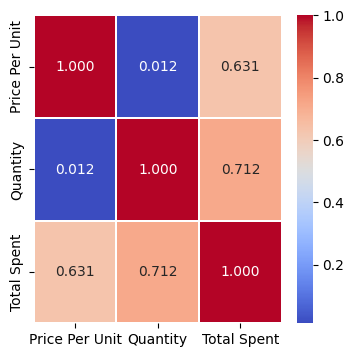

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

# Categorical Features

Number of unique values in each categorical feature

In [ ]:
unique_counts=categorical_data.nunique()
print(unique_counts)

Transaction ID      12575
Customer ID            25
Category                8
Item                  200
Payment Method          3
Location                2
Transaction Date     1114
Discount Applied        2
dtype: int64


# Barplot of unique value counts in categorical features

This is  excluding Transaction ID, Tramsaction Date and Item

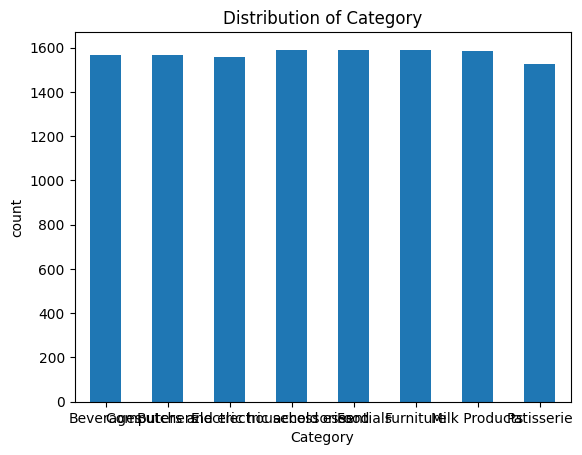

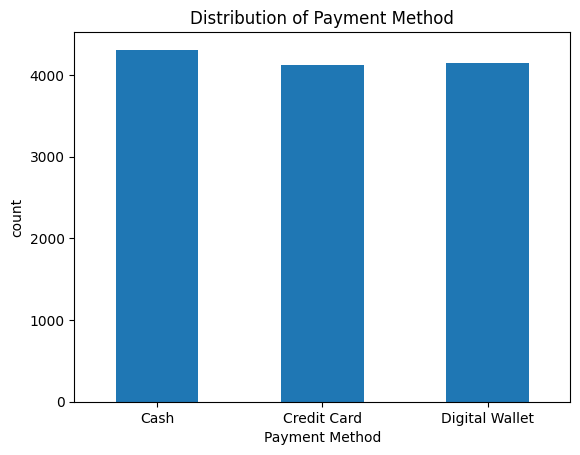

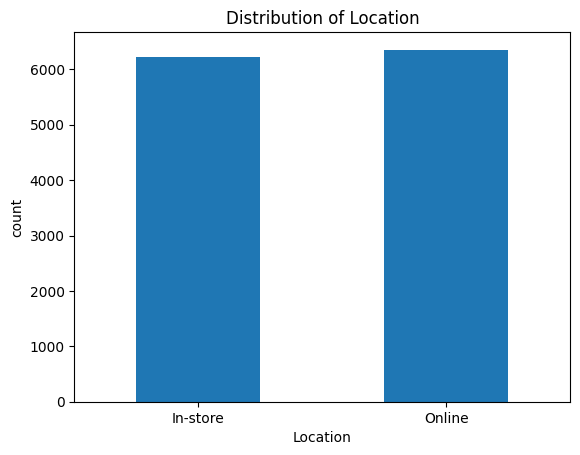

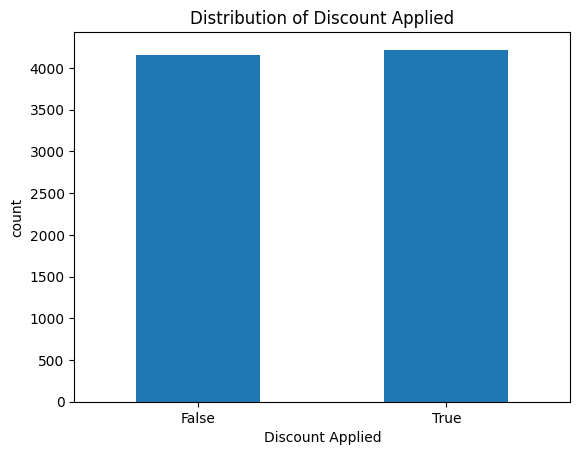

In [ ]:
for col in categorical_features:
    if col=="Transaction ID" or col=="Item" or col=="Transaction Date" or col=="Customer ID":
        continue
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

# Data Preprocessing

##Converting Catagorical features into Numeric feature

In [ ]:
#Drop columns
df_clean = dataset.drop(columns=["Transaction ID", "Customer ID", "Item"])

#missing values
# Discount Applied: convert to binary (1=True, 0=False, NaN -> 0)
df_clean["Discount Applied"] = df_clean["Discount Applied"].fillna(False).astype(int)

# handling transaction Date
df_clean["Transaction Date"] = pd.to_datetime(df_clean["Transaction Date"])
df_clean["month"] = df_clean["Transaction Date"].dt.month

#Encode
# Location: binary encoding (0 = Online, 1 = In Store)
df_clean["Location"] = df_clean["Location"].apply(lambda x: 0 if x=="Online" else 1)

# One-hot encode Category, Payment Method, and month
df_encoded = pd.get_dummies(
    df_clean,
    columns=["Category", "Payment Method", "month"],
    drop_first=False,
    dtype=int
)

df_encoded = df_encoded.drop(columns=["Transaction Date"])

print("Encoded dataset shape:", df_encoded.shape)
print(df_encoded.head(3))

Encoded dataset shape: (12575, 28)
   Price Per Unit  Quantity  Total Spent  Location  Discount Applied  \
0            18.5      10.0        185.0         0                 1   
1            29.0       9.0        261.0         0                 1   
2            21.5       2.0         43.0         0                 0   

   Category_Beverages  Category_Butchers  \
0                   0                  0   
1                   0                  0   
2                   0                  1   

   Category_Computers and electric accessories  \
0                                            0   
1                                            0   
2                                            0   

   Category_Electric household essentials  Category_Food  ...  month_3  \
0                                       0              0  ...        0   
1                                       0              0  ...        0   
2                                       0              0  ...        0   

 

/tmp/ipython-input-573585849.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Discount Applied"] = df_clean["Discount Applied"].fillna(False).astype(int)


In [ ]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Price Per Unit,11966.0,23.365912,10.743519,5.0,14.0,23.0,33.5,41.0
Quantity,11971.0,5.536380,2.857883,1.0,3.0,6.0,8.0,10.0
Total Spent,11971.0,129.652577,94.750697,5.0,51.0,108.5,192.0,410.0
Location,12575.0,0.494712,0.499992,0.0,0.0,0.0,1.0,1.0
Discount Applied,12575.0,0.335507,0.472186,0.0,0.0,0.0,1.0,1.0
Category_Beverages,12575.0,0.124612,0.330292,0.0,0.0,0.0,0.0,1.0
Category_Butchers,12575.0,0.124692,0.330382,0.0,0.0,0.0,0.0,1.0
Category_Computers and electric accessories,12575.0,0.123897,0.329477,0.0,0.0,0.0,0.0,1.0
Category_Electric household essentials,12575.0,0.126521,0.332449,0.0,0.0,0.0,0.0,1.0
Category_Food,12575.0,0.126282,0.332180,0.0,0.0,0.0,0.0,1.0


##Handling Null Values

In [ ]:
df_encoded.isnull().sum()

,0
Price Per Unit,609
Quantity,604
Total Spent,604
Location,0
Discount Applied,0
Category_Beverages,0
Category_Butchers,0
Category_Computers and electric accessories,0
Category_Electric household essentials,0
Category_Food,0


Now we are dropping the rows consisting of null values

In [ ]:
df_encoded=df_encoded.dropna(subset=["Price Per Unit", "Quantity", "Total Spent"])
df_encoded.isnull().sum()

,0
Price Per Unit,0
Quantity,0
Total Spent,0
Location,0
Discount Applied,0
Category_Beverages,0
Category_Butchers,0
Category_Computers and electric accessories,0
Category_Electric household essentials,0
Category_Food,0


##Feature Selection

In [ ]:
num_cols = ["Price Per Unit", "Quantity", "Total Spent", "Discount Applied", "Location",'Payment Method_Cash','Payment Method_Credit Card','Payment Method_Digital Wallet']
df_corr=df_encoded[num_cols].corr()
df_corr

,Price Per Unit,Quantity,Total Spent,Discount Applied,Location,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet
Price Per Unit,1.000000,0.011801,0.630902,0.009194,-0.004951,0.014312,-0.013255,-0.001233
Quantity,0.011801,1.000000,0.712711,-0.001806,-0.008710,0.004819,-0.000074,-0.004808
Total Spent,0.630902,0.712711,1.000000,0.008098,-0.008619,0.011476,-0.004558,-0.007064
Discount Applied,0.009194,-0.001806,0.008098,1.000000,-0.006376,0.004561,0.002985,-0.007609
Location,-0.004951,-0.008710,-0.008619,-0.006376,1.000000,0.004283,-0.005809,0.001475
Payment Method_Cash,0.014312,0.004819,0.011476,0.004561,0.004283,1.000000,-0.506983,-0.505668
Payment Method_Credit Card,-0.013255,-0.000074,-0.004558,0.002985,-0.005809,-0.506983,1.000000,-0.487270
Payment Method_Digital Wallet,-0.001233,-0.004808,-0.007064,-0.007609,0.001475,-0.505668,-0.487270,1.000000


<Axes: >

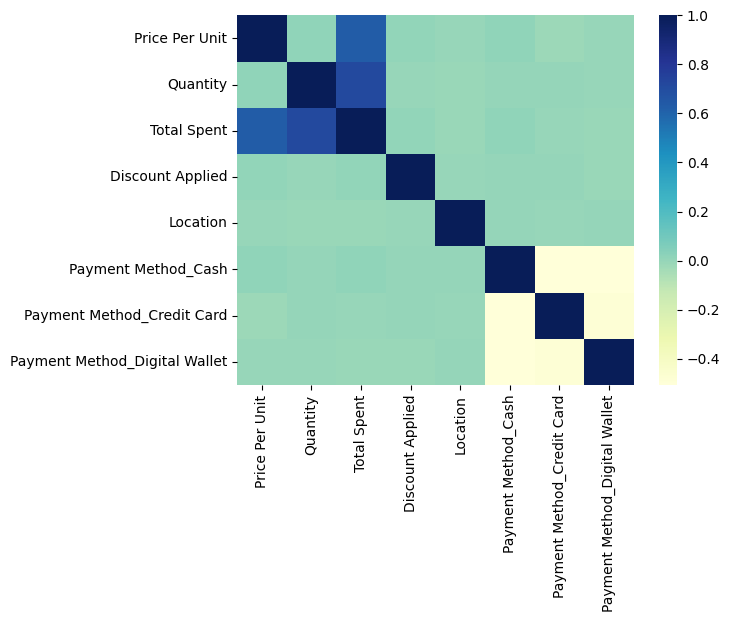

In [ ]:
import seaborn as sns

sns.heatmap(df_corr, cmap = 'YlGnBu')

In [ ]:
#Dropping Quantity feature as it is highly correlated with total spent
df_encoded = df_encoded.drop(columns=['Quantity'])

##Feature Scaling

In [ ]:
print("Variance")
print(df_encoded.var())

Variance
Price Per Unit                                  115.262337
Total Spent                                    8960.963948
Location                                          0.249990
Discount Applied                                  0.222641
Category_Beverages                                0.109830
Category_Butchers                                 0.109434
Category_Computers and electric accessories       0.107846
Category_Electric household essentials            0.110488
Category_Food                                     0.109764
Category_Furniture                                0.111996
Category_Milk Products                            0.109698
Category_Patisserie                               0.105981
Payment Method_Cash                               0.225916
Payment Method_Credit Card                        0.220504
Payment Method_Digital Wallet                     0.220109
month_1                                           0.096200
month_2                                        

We will use Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_array=scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled_array, columns=df_encoded.columns, index=df_encoded.index)

print(df_scaled.var())

Price Per Unit                                 1.000088
Total Spent                                    1.000088
Location                                       1.000088
Discount Applied                               1.000088
Category_Beverages                             1.000088
Category_Butchers                              1.000088
Category_Computers and electric accessories    1.000088
Category_Electric household essentials         1.000088
Category_Food                                  1.000088
Category_Furniture                             1.000088
Category_Milk Products                         1.000088
Category_Patisserie                            1.000088
Payment Method_Cash                            1.000088
Payment Method_Credit Card                     1.000088
Payment Method_Digital Wallet                  1.000088
month_1                                        1.000088
month_2                                        1.000088
month_3                                        1

##PCA(Principal Component Analysis)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
print(f'Before PCA\nShape: {df_scaled.shape}')
# Apply PCA
pca = PCA(.95)
df_pca_array = pca.fit_transform(df_scaled)
print(f'After PCA\nShape:{df_pca_array.shape}')
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


# Convert the PCA array back to a DataFrame
df_pca = pd.DataFrame(df_pca_array, index=df_scaled.index)

df_pca.columns = [f'PCA_{i+1}' for i in range(df_pca.shape[1])]

print("\nConverted DataFrame:")
display(df_pca.head())

Before PCA
Shape: (11362, 27)
After PCA
Shape:(11362, 22)
[0.06159975 0.05616927 0.05539431 0.04374592 0.04341461 0.04311775
 0.04290115 0.04266337 0.04250192 0.04233533 0.04138145 0.04052591
 0.04037315 0.040298   0.04019906 0.04004463 0.03989348 0.03953868
 0.03945453 0.03916659 0.03897152 0.03654615]
0.9502365262531985

Converted DataFrame:


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22
0,-0.063840,-0.856320,1.506615,-1.337392,0.569227,1.148410,-0.161463,2.080390,-0.553305,-0.059699,...,-0.266154,-1.800616,0.232335,1.317647,0.223622,-0.469695,1.097868,1.502913,-1.442446,2.152100
1,0.776558,-0.670230,1.713308,1.470243,-1.397878,-0.968746,-0.111617,-0.542368,-1.387512,2.105409,...,0.739541,-0.719786,-0.209531,1.515302,-1.216964,1.005095,0.647411,0.546228,1.271323,1.100489
2,-0.549741,-1.273598,-1.419525,1.892552,0.598933,0.411538,0.344786,0.032108,-1.722874,-1.429714,...,-0.272806,-0.307950,0.441087,-0.692966,1.316571,-1.418881,-0.161906,-1.324385,0.935124,0.085457
3,0.937355,-0.864794,-1.107764,0.172656,0.637758,1.370499,-1.983972,-1.885148,0.946645,1.263044,...,-0.441722,-1.624015,-1.653844,-1.502012,-0.949410,-0.705793,-0.456697,0.099056,0.008627,-0.085572
4,-1.125296,-0.372586,1.701568,2.062026,0.396698,-0.743144,-0.002112,1.031158,1.531219,-0.930768,...,-0.308020,-0.388661,0.064257,-0.953409,1.912653,-0.573282,-0.039476,-0.265562,1.233077,0.490534


#Clustering Attempt 1

##Selecting Number of Clusters





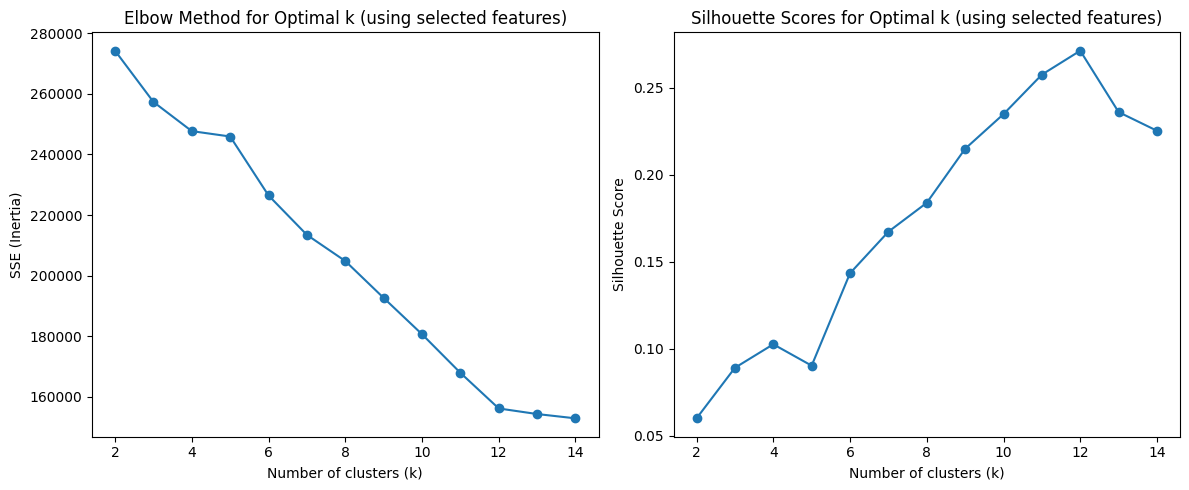

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_pca)
    sse.append(km.inertia_)
    labels = km.labels_
    silhouette_scores.append(silhouette_score(df_pca, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method
axes[0].plot(K, sse, marker='o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('SSE (Inertia)')
axes[0].set_title('Elbow Method for Optimal k (using selected features)')

# Silhouette Score
axes[1].plot(K, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores for Optimal k (using selected features)')

plt.tight_layout()
plt.show()

In [ ]:
#Having 12 clusters is nearly impossible to describe in business terms
#So we will use Silhouette_score
from sklearn.metrics import silhouette_score

for k in range(2, 13):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print(f"k={k}, silhouette score={score:.3f}")


k=2, silhouette score=0.060
k=3, silhouette score=0.089
k=4, silhouette score=0.063
k=5, silhouette score=0.073
k=6, silhouette score=0.089
k=7, silhouette score=0.166
k=8, silhouette score=0.192
k=9, silhouette score=0.215
k=10, silhouette score=0.235
k=11, silhouette score=0.257
k=12, silhouette score=0.238


##Plotting the Clusters

      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.063840 -0.856320  1.506615 -1.337392  0.569227  1.148410 -0.161463   
1  0.776558 -0.670230  1.713308  1.470243 -1.397878 -0.968746 -0.111617   
2 -0.549741 -1.273598 -1.419525  1.892552  0.598933  0.411538  0.344786   
3  0.937355 -0.864794 -1.107764  0.172656  0.637758  1.370499 -1.983972   
4 -1.125296 -0.372586  1.701568  2.062026  0.396698 -0.743144 -0.002112   

      PCA_8     PCA_9    PCA_10  ...    PCA_14    PCA_15    PCA_16    PCA_17  \
0  2.080390 -0.553305 -0.059699  ... -1.800616  0.232335  1.317647  0.223622   
1 -0.542368 -1.387512  2.105409  ... -0.719786 -0.209531  1.515302 -1.216964   
2  0.032108 -1.722874 -1.429714  ... -0.307950  0.441087 -0.692966  1.316571   
3 -1.885148  0.946645  1.263044  ... -1.624015 -1.653844 -1.502012 -0.949410   
4  1.031158  1.531219 -0.930768  ... -0.388661  0.064257 -0.953409  1.912653   

     PCA_18    PCA_19    PCA_20    PCA_21    PCA_22  Cluster  
0 -0.

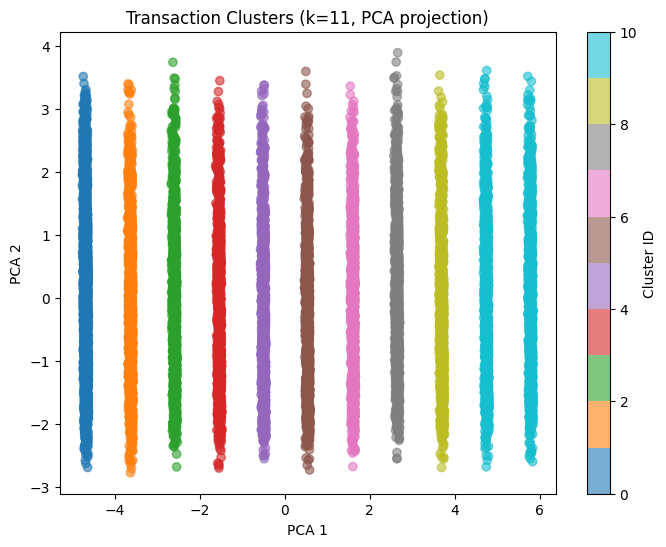

In [ ]:
from sklearn.decomposition import PCA
#using best silhouette score cluster
kmeans = KMeans(n_clusters=11, random_state=42, n_init=10)
y_predicted = kmeans.fit_predict(df_pca)
df_pca["Cluster"]=y_predicted
print(df_pca.head())

pca = PCA(.95)
reduced = pca.fit_transform(df_pca)
print(reduced.shape)


plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df_pca["Cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Transaction Clusters (k=11, PCA projection)")
plt.colorbar(label="Cluster ID")
plt.show()

meta cluster labels: [2 1 1 0 0 2 2 1 1 2 0]
cluster to meta cluster: {0: np.int32(2), 1: np.int32(1), 2: np.int32(1), 3: np.int32(0), 4: np.int32(0), 5: np.int32(2), 6: np.int32(2), 7: np.int32(1), 8: np.int32(1), 9: np.int32(2), 10: np.int32(0)}
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.063840 -0.856320  1.506615 -1.337392  0.569227  1.148410 -0.161463   
1  0.776558 -0.670230  1.713308  1.470243 -1.397878 -0.968746 -0.111617   
2 -0.549741 -1.273598 -1.419525  1.892552  0.598933  0.411538  0.344786   
3  0.937355 -0.864794 -1.107764  0.172656  0.637758  1.370499 -1.983972   
4 -1.125296 -0.372586  1.701568  2.062026  0.396698 -0.743144 -0.002112   

      PCA_8     PCA_9    PCA_10  ...    PCA_15    PCA_16    PCA_17    PCA_18  \
0  2.080390 -0.553305 -0.059699  ...  0.232335  1.317647  0.223622 -0.469695   
1 -0.542368 -1.387512  2.105409  ... -0.209531  1.515302 -1.216964  1.005095   
2  0.032108 -1.722874 -1.429714  ...  0.441087 -0.692966  1.3

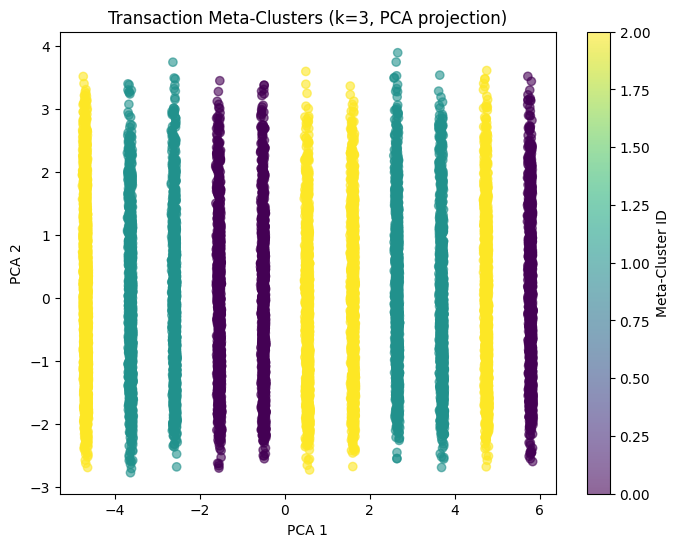

Number of data points in each meta-cluster:
Meta_Cluster
2    4928
1    3723
0    2711
Name: count, dtype: int64


In [ ]:
initial_centroids = kmeans.cluster_centers_
n_meta_clusters = 3
meta_kmeans = KMeans(n_clusters=n_meta_clusters, random_state=42, n_init=10)
meta_cluster_labels = meta_kmeans.fit_predict(initial_centroids)
print(f'meta cluster labels: {meta_cluster_labels}')


cluster_to_meta_cluster = dict(zip(range(12), meta_cluster_labels))
print(f'cluster to meta cluster: {cluster_to_meta_cluster}')

df_pca["Meta_Cluster"] = df_pca["Cluster"].map(cluster_to_meta_cluster)
print(df_pca.head())
# plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df_pca["Meta_Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Transaction Meta-Clusters (k={n_meta_clusters}, PCA projection)")
plt.colorbar(label="Meta-Cluster ID")
plt.show()

print(f"Number of data points in each meta-cluster:\n{df_pca['Meta_Cluster'].value_counts()}")

In [ ]:
df_encoded["Cluster"] = df_pca["Cluster"]
df_encoded["Meta_Cluster"] = df_pca["Meta_Cluster"]

summary = df_encoded.groupby("Meta_Cluster")[["Price Per Unit", "Total Spent", "Discount Applied"]].mean()

print(summary)


              Price Per Unit  Total Spent  Discount Applied
Meta_Cluster                                               
0                  23.204722   129.714681          0.328661
1                  23.410556   130.324738          0.341391
2                  23.399959   129.087459          0.332589


#Alternate Cluster technique

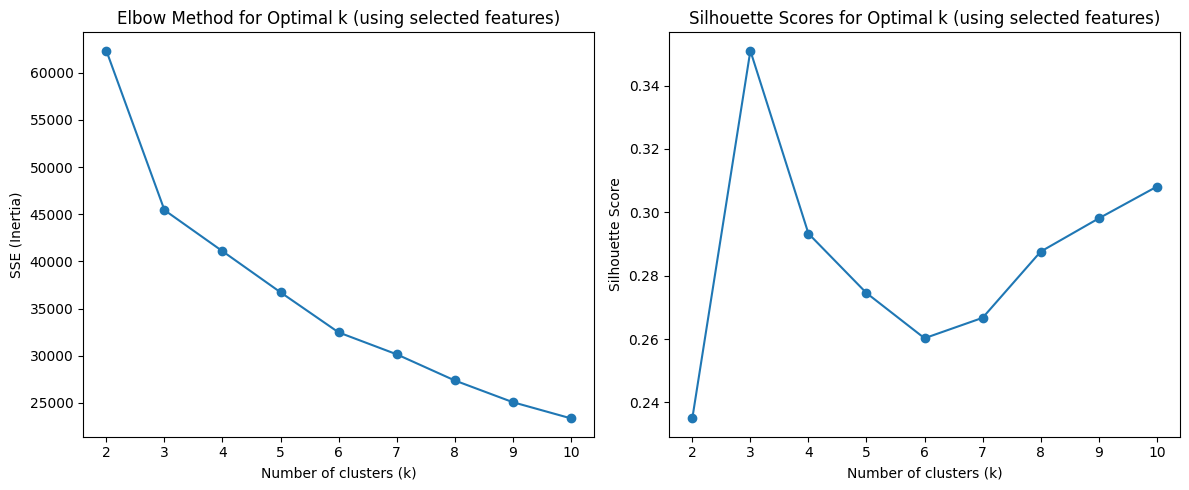

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
K = range(2, 11)

selected_features = [
    "Discount Applied",
    "Total Spent",
    "Price Per Unit",
    "Payment Method_Cash",
    "Payment Method_Credit Card",
    "Payment Method_Digital Wallet",
    "Location",
]



clustering_data = df_scaled[selected_features]

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(clustering_data)
    sse.append(km.inertia_)
    labels = km.labels_
    silhouette_scores.append(silhouette_score(clustering_data, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method plot
axes[0].plot(K, sse, marker='o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('SSE (Inertia)')
axes[0].set_title('Elbow Method for Optimal k (using selected features)')

# Silhouette Score plot
axes[1].plot(K, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores for Optimal k (using selected features)')

plt.tight_layout()
plt.show()

Elbow curve showing to take 3 clusters. So, we will make 3 clusters

/tmp/ipython-input-3653735114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["Cluster"]=y_predicted


   Discount Applied  Total Spent  Price Per Unit  Payment Method_Cash  \
0          1.410395     0.584814       -0.452408            -0.725345   
1          1.410395     1.387703        0.525651            -0.725345   
2         -0.709021    -0.915320       -0.172962            -0.725345   
3         -0.709021     1.245085        0.385928            -0.725345   
4         -0.709021    -0.445207       -1.011298            -0.725345   

   Payment Method_Credit Card  Payment Method_Digital Wallet  Location  \
0                   -0.698954                       1.434430 -0.988797   
1                   -0.698954                       1.434430 -0.988797   
2                    1.430709                      -0.697141 -0.988797   
3                    1.430709                      -0.697141 -0.988797   
4                   -0.698954                       1.434430 -0.988797   

   Cluster  
0        0  
1        0  
2        2  
3        2  
4        0  
(11362, 5)


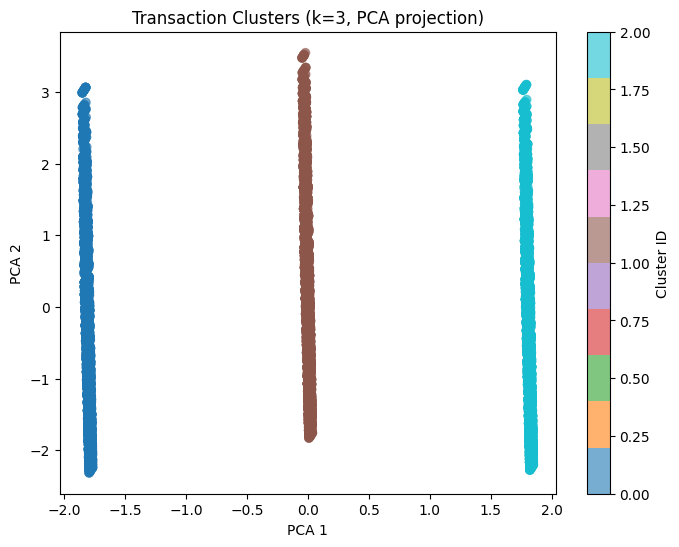

In [ ]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_predicted = kmeans.fit_predict(clustering_data)
clustering_data["Cluster"]=y_predicted
print(clustering_data.head())

pca = PCA(.95)
reduced = pca.fit_transform(clustering_data)
print(reduced.shape)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clustering_data["Cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Transaction Clusters (k=3, PCA projection)")
plt.colorbar(label="Cluster ID")
plt.show()

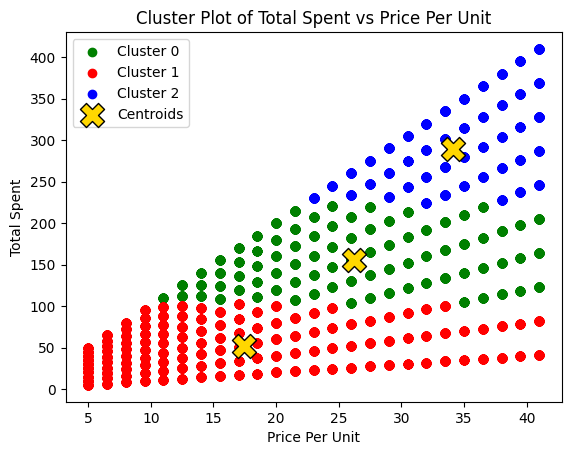

In [ ]:
def plot_cluster(km, df, x_feature, y_feature):
    color = ['green', 'red', 'blue', 'purple', 'black', 'yellow', 'cyan', 'magenta', 'gray', 'olive']
    num_clusters = km.n_clusters

    if num_clusters > len(color):
        print(f"Warning: Number of clusters ({num_clusters}) exceeds available colors ({len(color)}). Some clusters will share colors.")

    for i in range(num_clusters):
        cluster_data = df[df['Cluster'] == i]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], color=color[i], label=f'Cluster {i}')

    # Plot centroids
    centroids = km.cluster_centers_
    plt.scatter(centroids[:, df.columns.get_loc(x_feature)], centroids[:, df.columns.get_loc(y_feature)], color='gold', s=300, marker='X', edgecolor='black', label='Centroids')


    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Cluster Plot of {y_feature} vs {x_feature}')
    plt.legend()
    plt.show()


if 'Cluster' in clustering_data.columns and 'kmeans' in locals():
    plot_cluster(kmeans, clustering_data, 'Price Per Unit', 'Total Spent')
else:
    print("Clustering data or KMeans model not found. Please run the clustering step first.")

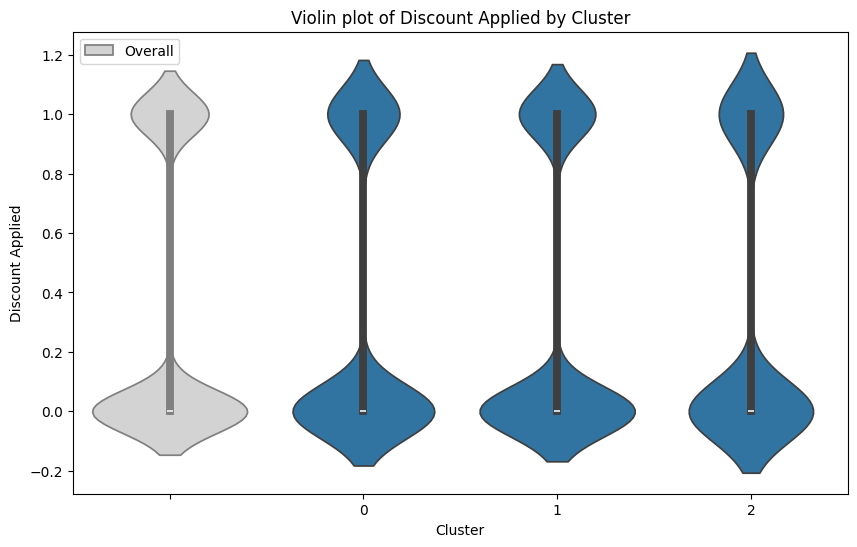

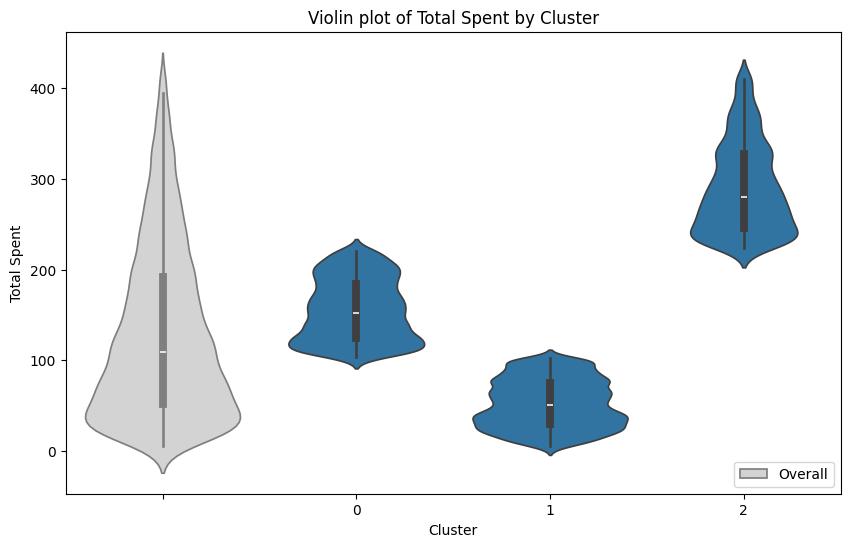

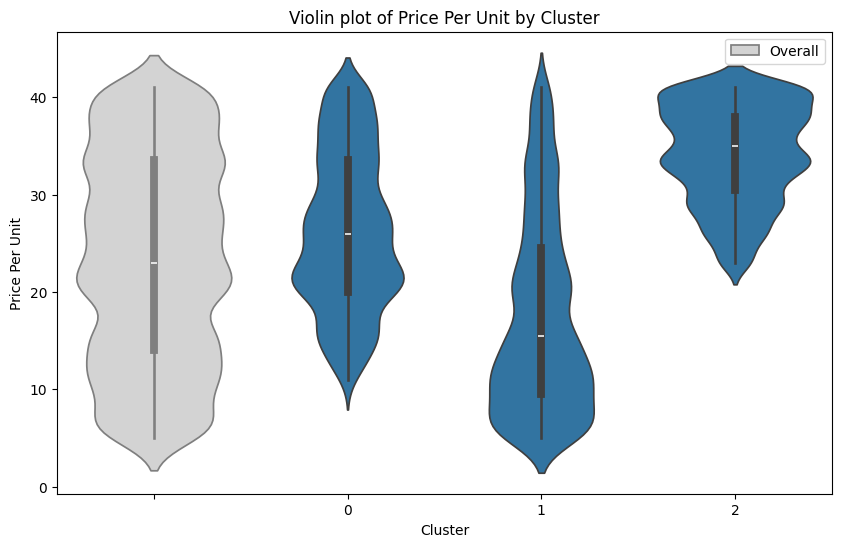

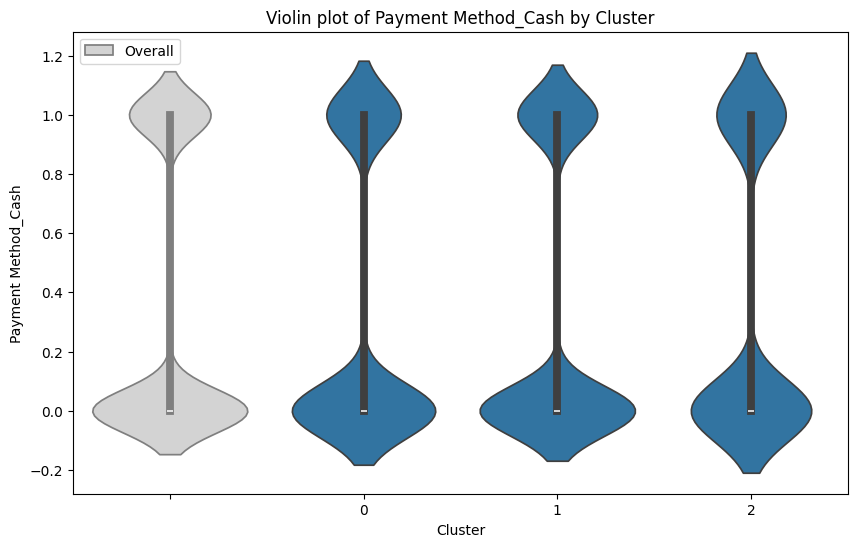

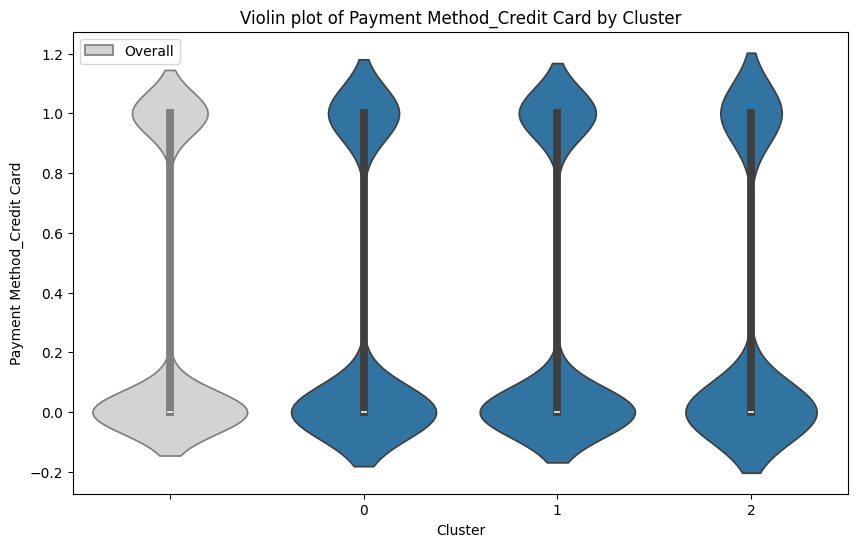

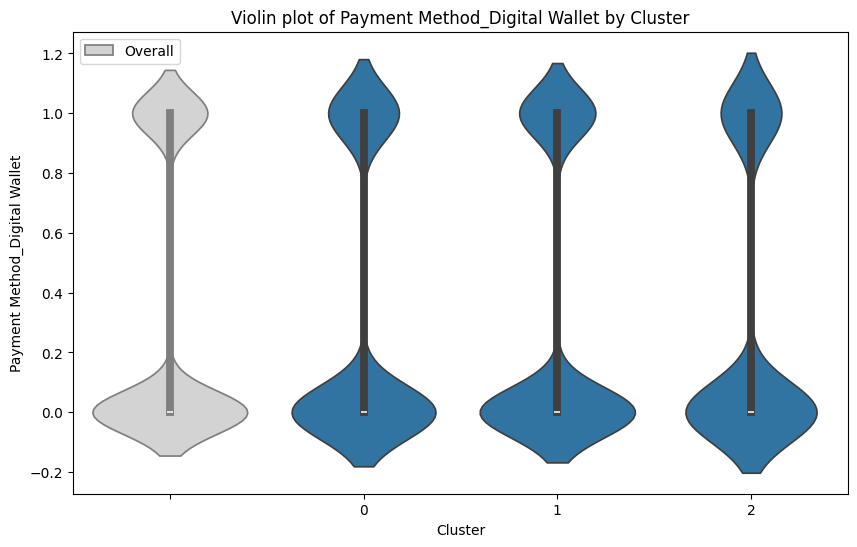

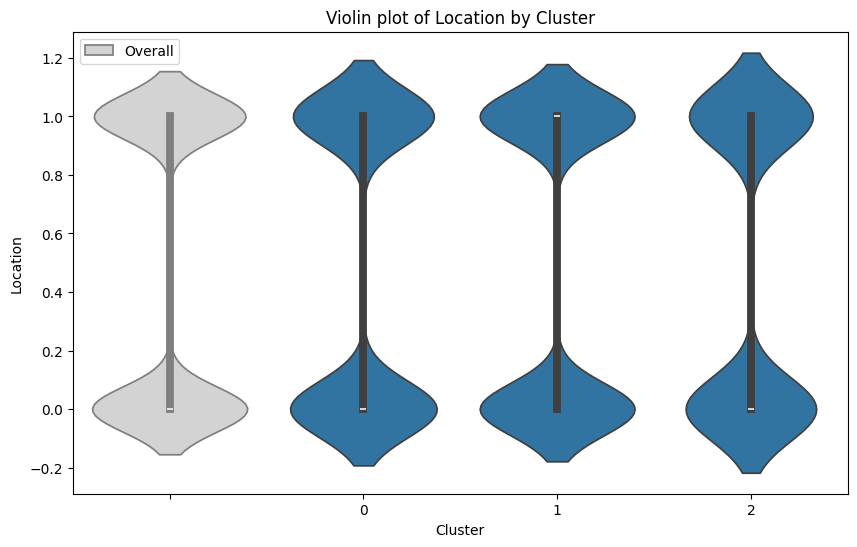

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

selected_features = [
    "Discount Applied",
    "Total Spent",
    "Price Per Unit",
    "Payment Method_Cash",
    "Payment Method_Credit Card",
    "Payment Method_Digital Wallet",
    "Location",
]
clustering_data = df_encoded[selected_features].copy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clustering_data["Cluster"] = kmeans.fit_predict(clustering_data)

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(y=feature, data=clustering_data, color='lightgrey', label='Overall')
    sns.violinplot(x="Cluster", y=feature, data=clustering_data)
    plt.title(f'Violin plot of {feature} by Cluster')
    plt.show()

In [ ]:
print("Cluster Summary Statistics:")
display(summary)

# names for the clusters
cluster_names = {
    0: "Medium Value Transactions",
    1: "Low Value Transactions",
    2: "High Value Transactions"
}

print("\nSuggested Cluster Names:")
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")

Cluster Summary Statistics:


,Price Per Unit,Total Spent,Discount Applied
Meta_Cluster,,,
0,23.204722,129.714681,0.328661
1,23.410556,130.324738,0.341391
2,23.399959,129.087459,0.332589



Suggested Cluster Names:
Cluster 0: Medium Value Transactions
Cluster 1: Low Value Transactions
Cluster 2: High Value Transactions


#Data spliting

In [ ]:
df_scaled_with_clusters = df_scaled.copy()
df_scaled_with_clusters['Cluster'] = clustering_data['Cluster']


#count
cluster_counts = df_scaled_with_clusters['Cluster'].value_counts().sort_index()

print("Number of data points in each cluster in df_scaled_with_clusters:")
print(cluster_counts)

Number of data points in each cluster in df_scaled_with_clusters:
Cluster
0    3795
1    5516
2    2051
Name: count, dtype: int64


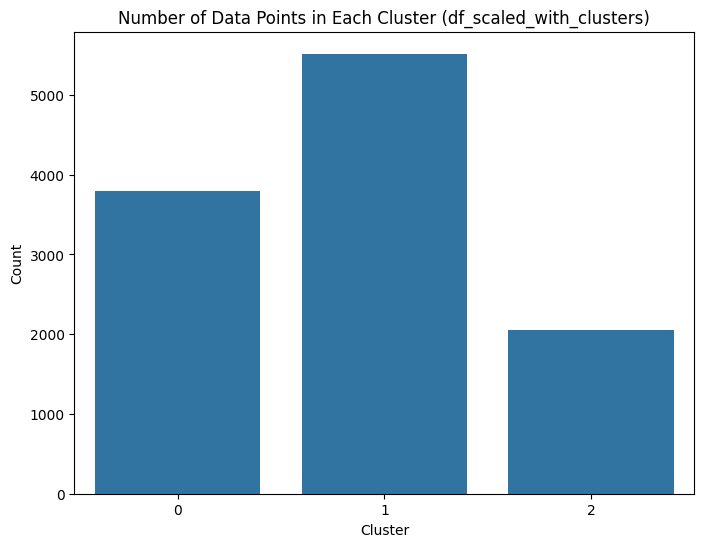

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Number of Data Points in Each Cluster (df_scaled_with_clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
min_cluster_size = cluster_counts.min()

#balanced data
balanced_df_scaled_with_clusters = pd.DataFrame()

# Downsample each cluster
for cluster_id in cluster_counts.index:
    cluster_data = df_scaled_with_clusters[df_scaled_with_clusters['Cluster'] == cluster_id]
    downsampled_cluster = cluster_data.sample(n=min_cluster_size, random_state=42)
    balanced_df_scaled_with_clusters = pd.concat([balanced_df_scaled_with_clusters, downsampled_cluster])

# Shuffle the balanced DataFrame
balanced_df_scaled_with_clusters = balanced_df_scaled_with_clusters.sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape of the original df_scaled_with_clusters:", df_scaled_with_clusters.shape)
print("Shape of the balanced_df_scaled_with_clusters:", balanced_df_scaled_with_clusters.shape)
print("\nNumber of data points in each cluster in the balanced data:")
print(balanced_df_scaled_with_clusters['Cluster'].value_counts().sort_index())

Shape of the original df_scaled_with_clusters: (11362, 28)
Shape of the balanced_df_scaled_with_clusters: (6153, 28)

Number of data points in each cluster in the balanced data:
Cluster
0    2051
1    2051
2    2051
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = balanced_df_scaled_with_clusters.drop('Cluster', axis=1)
y = balanced_df_scaled_with_clusters['Cluster']

# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4307, 27)
Shape of X_test: (1846, 27)
Shape of y_train: (4307,)
Shape of y_test: (1846,)


#Model Training of Model 1


##Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn_model = MLPClassifier(hidden_layer_sizes=(40,20 ), max_iter=500, random_state=42)

# Train
nn_model.fit(X_train, y_train)

#prediction
y_pred_nn = nn_model.predict(X_test)

# Evaluate
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"Neural Network Model Accuracy: {accuracy_nn:.4f}")

Neural Network Model Accuracy: 0.9691


##Logistic Regression





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train
logreg_model.fit(X_train, y_train)

# prediction
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression Model Accuracy: {accuracy_logreg:.4f}")


Logistic Regression Model Accuracy: 0.9897


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")


Decision Tree Model Accuracy: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model_to_cross_validate = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(model_to_cross_validate, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


#Model Training  of Model 2

In [ ]:
df_scaled_with_meta_clusters = df_scaled.copy()
df_scaled_with_meta_clusters['Meta_Cluster'] = df_pca['Meta_Cluster']

print("Shape of df_scaled_with_meta_clusters:", df_scaled_with_meta_clusters.shape)
print("\nFirst 5 rows of df_scaled_with_meta_clusters:")
display(df_scaled_with_meta_clusters.head())

Shape of df_scaled_with_meta_clusters: (11362, 28)

First 5 rows of df_scaled_with_meta_clusters:


,Price Per Unit,Total Spent,Location,Discount Applied,Category_Beverages,Category_Butchers,Category_Computers and electric accessories,Category_Electric household essentials,Category_Food,Category_Furniture,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Meta_Cluster
0,-0.452408,0.584814,-0.988797,1.410395,-0.37899,-0.378079,-0.37442,-0.380507,-0.378838,-0.383986,...,3.407409,-0.299974,-0.301019,-0.306206,-0.302408,-0.299626,-0.290282,-0.292238,-0.299277,0
1,0.525651,1.387703,-0.988797,1.410395,-0.37899,-0.378079,-0.37442,-0.380507,-0.378838,-0.383986,...,-0.293478,-0.299974,-0.301019,3.265777,-0.302408,-0.299626,-0.290282,-0.292238,-0.299277,2
2,-0.172962,-0.915320,-0.988797,-0.709021,-0.37899,2.644953,-0.37442,-0.380507,-0.378838,-0.383986,...,-0.293478,-0.299974,-0.301019,-0.306206,-0.302408,-0.299626,3.444923,-0.292238,-0.299277,2
3,0.385928,1.245085,-0.988797,-0.709021,2.63859,-0.378079,-0.37442,-0.380507,-0.378838,-0.383986,...,-0.293478,3.333618,-0.301019,-0.306206,-0.302408,-0.299626,-0.290282,-0.292238,-0.299277,0
4,-1.011298,-0.445207,-0.988797,-0.709021,-0.37899,-0.378079,-0.37442,-0.380507,2.639648,-0.383986,...,-0.293478,-0.299974,-0.301019,-0.306206,-0.302408,-0.299626,3.444923,-0.292238,-0.299277,2


In [ ]:
meta_cluster_counts = df_scaled_with_meta_clusters['Meta_Cluster'].value_counts().sort_index()

min_meta_cluster_size = meta_cluster_counts.min()
balanced_df_scaled_with_meta_clusters = pd.DataFrame()

# Downsample each meta-cluster
for meta_cluster_id in meta_cluster_counts.index:
    meta_cluster_data = df_scaled_with_meta_clusters[df_scaled_with_meta_clusters['Meta_Cluster'] == meta_cluster_id]
    downsampled_meta_cluster = meta_cluster_data.sample(n=min_meta_cluster_size, random_state=42)
    balanced_df_scaled_with_meta_clusters = pd.concat([balanced_df_scaled_with_meta_clusters, downsampled_meta_cluster])

# Shuffle the balanced DataFrame
balanced_df_scaled_with_meta_clusters = balanced_df_scaled_with_meta_clusters.sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape of the original df_scaled_with_meta_clusters:", df_scaled_with_meta_clusters.shape)
print("Shape of the balanced_df_scaled_with_meta_clusters:", balanced_df_scaled_with_meta_clusters.shape)
print("\nNumber of data points in each meta-cluster in the balanced data:")
print(balanced_df_scaled_with_meta_clusters['Meta_Cluster'].value_counts().sort_index())

Shape of the original df_scaled_with_meta_clusters: (11362, 28)
Shape of the balanced_df_scaled_with_meta_clusters: (8133, 28)

Number of data points in each meta-cluster in the balanced data:
Meta_Cluster
0    2711
1    2711
2    2711
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_meta = balanced_df_scaled_with_meta_clusters.drop('Meta_Cluster', axis=1)
y_meta = balanced_df_scaled_with_meta_clusters['Meta_Cluster']

#(70% train, 30% test)
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.3, random_state=42, stratify=y_meta)

print("Shape of X_train_meta:", X_train_meta.shape)
print("Shape of X_test_meta:", X_test_meta.shape)
print("Shape of y_train_meta:", y_train_meta.shape)
print("Shape of y_test_meta:", y_test_meta.shape)

Shape of X_train_meta: (5693, 27)
Shape of X_test_meta: (2440, 27)
Shape of y_train_meta: (5693,)
Shape of y_test_meta: (2440,)


##Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn_meta_model = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, random_state=42)

# Train
nn_meta_model.fit(X_train_meta, y_train_meta)

# prediction
y_pred_nn_meta = nn_meta_model.predict(X_test_meta)

# Evaluate
accuracy_nn_meta = accuracy_score(y_test_meta, y_pred_nn_meta)

print(f"Neural Network Model Accuracy (Meta-Clusters): {accuracy_nn_meta:.4f}")

Neural Network Model Accuracy (Meta-Clusters): 1.0000


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg_meta_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Train
logreg_meta_model.fit(X_train_meta, y_train_meta)

# Make prediction
y_pred_logreg_meta = logreg_meta_model.predict(X_test_meta)

# Evaluate
accuracy_logreg_meta = accuracy_score(y_test_meta, y_pred_logreg_meta)

print(f"Logistic Regression Model Accuracy (Meta-Clusters): {accuracy_logreg_meta:.4f}")

Logistic Regression Model Accuracy (Meta-Clusters): 1.0000


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=4)

# Train
dt_model.fit(X_train_meta, y_train_meta)

# Make prediction
y_pred_dt_meta = dt_model.predict(X_test_meta)

# Evaluate
accuracy_dt_meta = accuracy_score(y_test_meta, y_pred_dt_meta)

print(f"Decision Tree Model Accuracy: {accuracy_dt_meta:.4f}")


Decision Tree Model Accuracy: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model_to_cross_validate = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(model_to_cross_validate, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


# Model One Evaluation


##Precision, recall comparison of each model.

In [ ]:
from sklearn.metrics import classification_report
class_labels = y_test.unique()
print("Neural Network:")
print(classification_report(y_test, y_pred_nn, target_names=class_labels.astype(str)))
print("--------------------------------------------------------")
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, target_names=class_labels.astype(str)))
print("--------------------------------------------------------")
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=class_labels.astype(str)))

Neural Network:
              precision    recall  f1-score   support

           2       1.00      0.99      0.99       615
           0       1.00      1.00      1.00       615
           1       0.99      1.00      0.99       616

    accuracy                           0.99      1846
   macro avg       0.99      0.99      0.99      1846
weighted avg       0.99      0.99      0.99      1846

--------------------------------------------------------
Logistic Regression:
              precision    recall  f1-score   support

           2       0.99      0.98      0.98       615
           0       1.00      0.99      1.00       615
           1       0.98      1.00      0.99       616

    accuracy                           0.99      1846
   macro avg       0.99      0.99      0.99      1846
weighted avg       0.99      0.99      0.99      1846

--------------------------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           2     

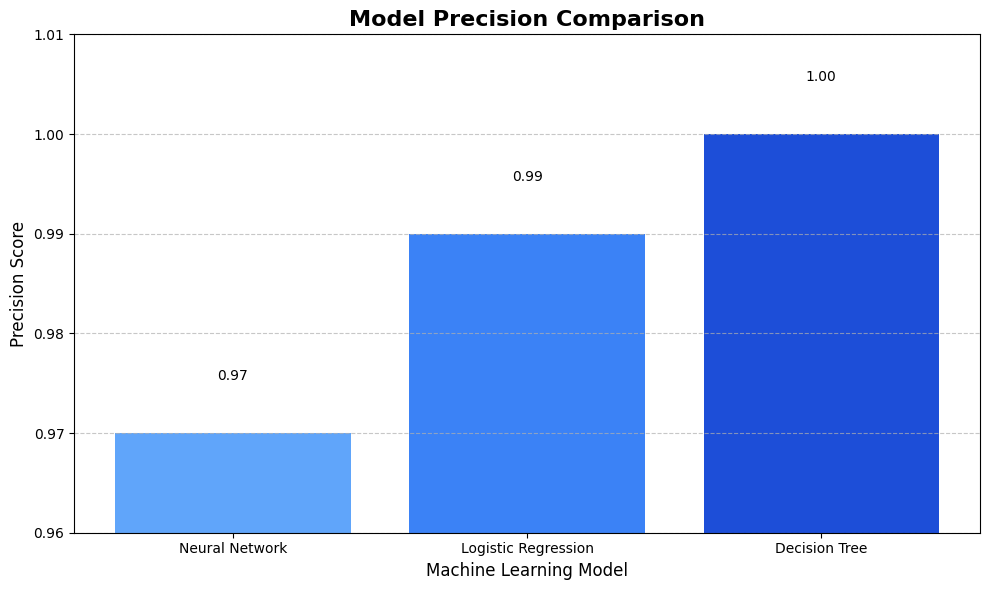

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Neural Network', 'Logistic Regression', 'Decision Tree']
precision = [0.97, 0.99, 1.00]

bar_colors = ['#60a5fa', '#3b82f6', '#1d4ed8']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color=bar_colors)
plt.title('Model Precision Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Precision Score', fontsize=12)
plt.ylim(0.96, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#precision values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Step 4: Compute ROC & AUC and Plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# Define models
models = {
    "Neural Network": MLPClassifier(hidden_layer_sizes=(40, 20), max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

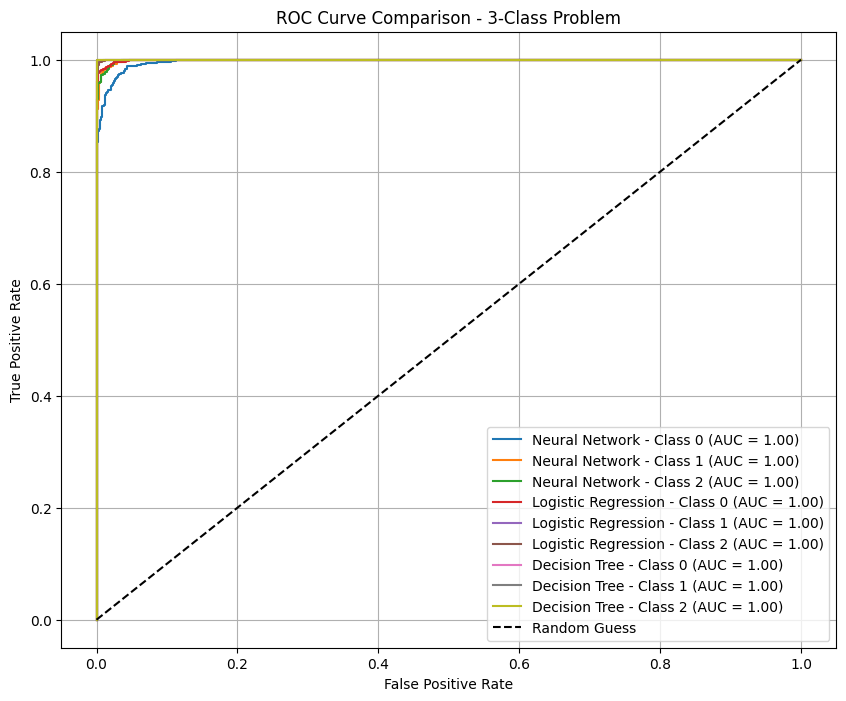

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

n_classes = len(np.unique(y_test))
classes = np.unique(y_test)

# Plotting setup
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)
    y_test_binarized = label_binarize(y_test, classes=classes)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} - Class {classes[i]} (AUC = {roc_auc:.2f})")

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - 3-Class Problem")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Multiclass Confusion Matrix


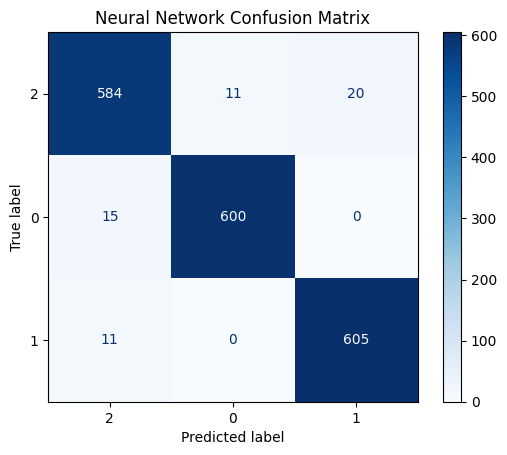

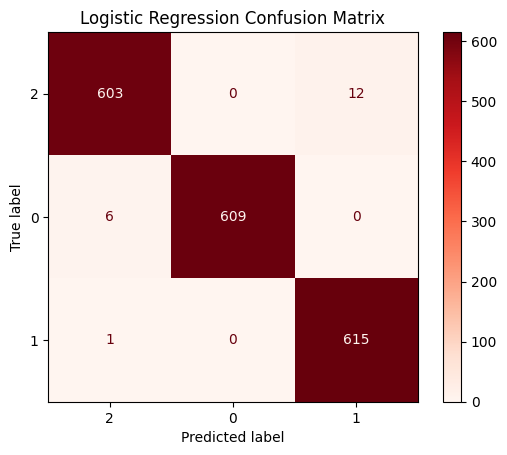

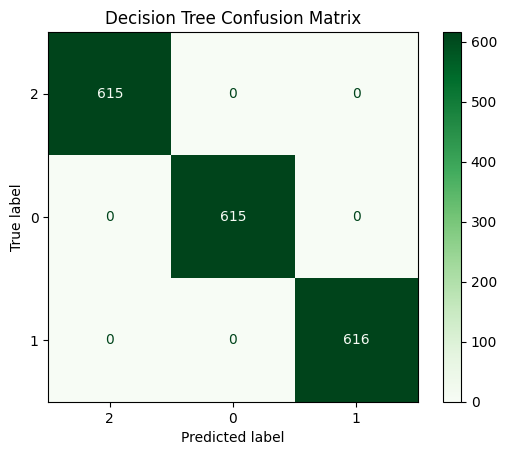

Neural Network Accuracy: 0.9691224268689057
Logistic Regression Accuracy: 0.9897074756229686
Decision Tree Accuracy: 1.0


In [ ]:
# Get the unique labels from the test set
class_labels = y_test.unique()

# Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=class_labels).plot(cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_log, display_labels=class_labels).plot(cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree
cm_rf = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_rf, display_labels=class_labels).plot(cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Accuracy comparison
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Model Two Evaluation


##Precision, recall comparison of each model.

In [ ]:
from sklearn.metrics import classification_report
class_labels = y_test_meta.unique()
print("Neural Network:")
print(classification_report(y_test_meta, y_pred_nn_meta, target_names=class_labels.astype(str)))
print("--------------------------------------------------------")
print("Logistic Regression:")
print(classification_report(y_test_meta, y_pred_logreg_meta, target_names=class_labels.astype(str)))
print("--------------------------------------------------------")
print("Decision Tree:")
print(classification_report(y_test_meta, y_pred_dt_meta, target_names=class_labels.astype(str)))

Neural Network:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       813
           0       1.00      1.00      1.00       814

    accuracy                           1.00      2440
   macro avg       1.00      1.00      1.00      2440
weighted avg       1.00      1.00      1.00      2440

--------------------------------------------------------
Logistic Regression:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       813
           0       1.00      1.00      1.00       814

    accuracy                           1.00      2440
   macro avg       1.00      1.00      1.00      2440
weighted avg       1.00      1.00      1.00      2440

--------------------------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           2     

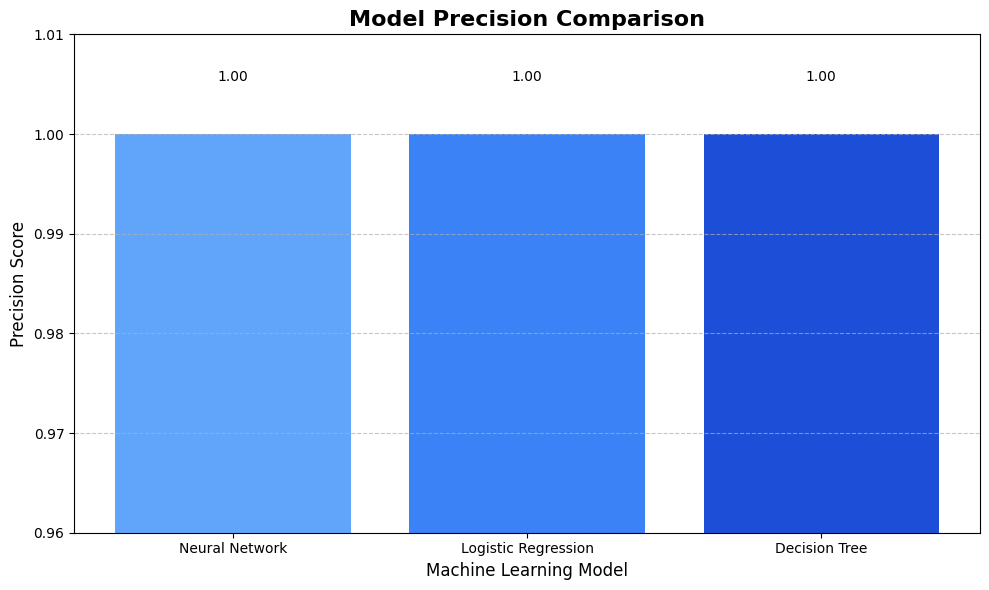

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Neural Network', 'Logistic Regression', 'Decision Tree']
precision = [1.00, 1.00, 1.00]
bar_colors = ['#60a5fa', '#3b82f6', '#1d4ed8']
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color=bar_colors)

plt.title('Model Precision Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Precision Score', fontsize=12)
plt.ylim(0.96, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Step 4: Compute ROC & AUC and Plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# Define models
models = {
    "Neural Network": MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}


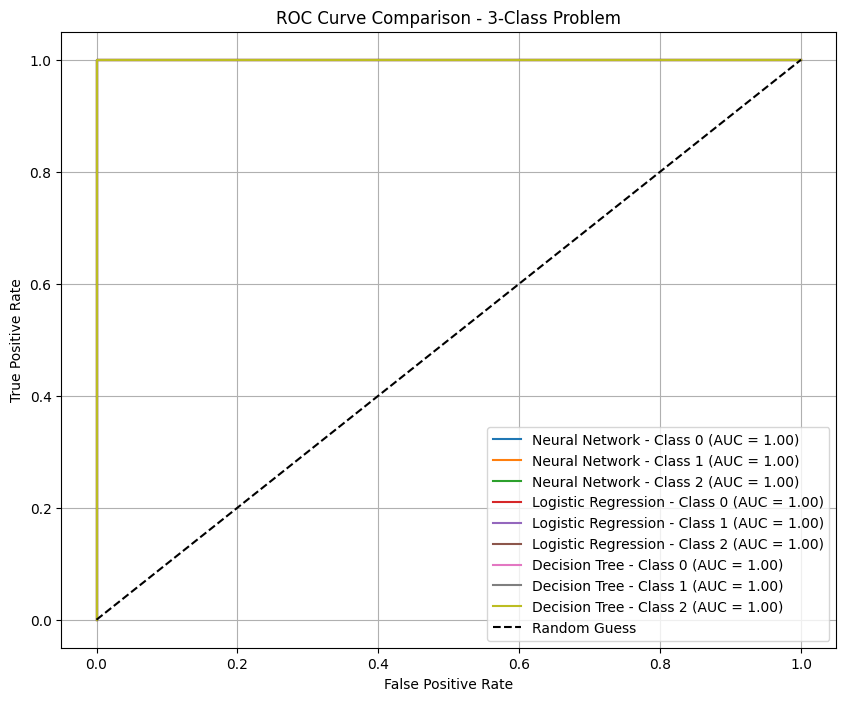

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# number of classes and unique class labels
n_classes = len(np.unique(y_test_meta))
classes = np.unique(y_test_meta)
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_meta, y_train_meta)
    y_probs_meta = model.predict_proba(X_test_meta)
    y_test_meta_binarized = label_binarize(y_test_meta, classes=classes)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_meta_binarized[:, i], y_probs_meta[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} - Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - 3-Class Problem")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Multiclass Confusion Matrix


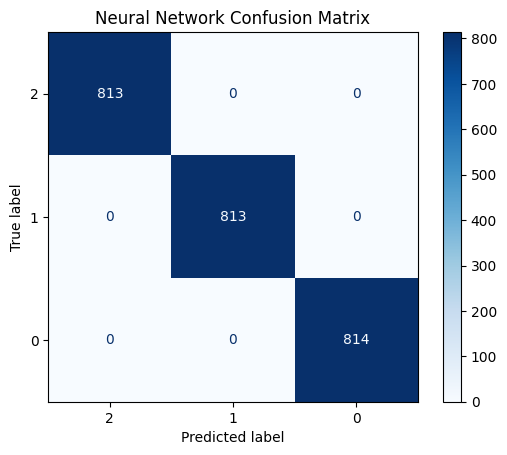

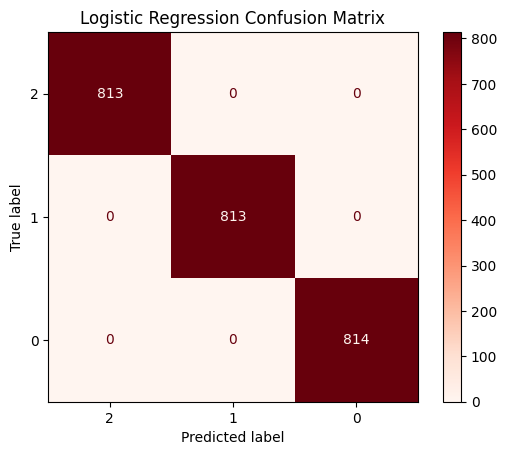

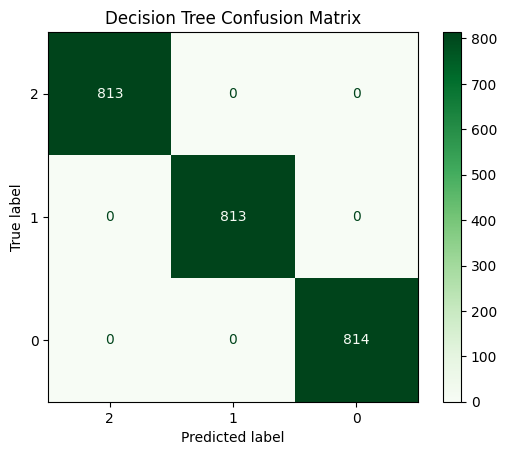

Neural Network Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [ ]:
class_labels = y_test_meta.unique()

# Neural Network
cm_nn = confusion_matrix(y_test_meta, y_pred_nn_meta)
ConfusionMatrixDisplay(cm_nn, display_labels=class_labels).plot(cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

# Logistic Regression
cm_log = confusion_matrix(y_test_meta, y_pred_logreg_meta)
ConfusionMatrixDisplay(cm_log, display_labels=class_labels).plot(cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree
cm_rf = confusion_matrix(y_test_meta, y_pred_dt_meta)
ConfusionMatrixDisplay(cm_rf, display_labels=class_labels).plot(cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Accuracy comparison
print("Neural Network Accuracy:", accuracy_score(y_test_meta, y_pred_nn_meta))
print("Logistic Regression Accuracy:", accuracy_score(y_test_meta, y_pred_logreg_meta))
print("Decision Tree Accuracy:", accuracy_score(y_test_meta, y_pred_dt_meta))